In [1]:
%matplotlib inline
!pip install --upgrade --user seaborn matplotlib

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif

In [3]:
# Load data
flood_training_data = pd.read_csv("Sierra_Leone-Weather_Data.csv")

In [4]:
print(flood_training_data.head())

          dt                         dt_iso  timezone     city_name       lat  \
0  283996800  1979-01-01 00:00:00 +0000 UTC         0  Sierra Leone  8.460555   
1  284000400  1979-01-01 01:00:00 +0000 UTC         0  Sierra Leone  8.460555   
2  284004000  1979-01-01 02:00:00 +0000 UTC         0  Sierra Leone  8.460555   
3  284007600  1979-01-01 03:00:00 +0000 UTC         0  Sierra Leone  8.460555   
4  284011200  1979-01-01 04:00:00 +0000 UTC         0  Sierra Leone  8.460555   

         lon    temp  visibility  dew_point  feels_like  ...  wind_gust  \
0 -11.779889  296.36         NaN     296.19      297.32  ...        NaN   
1 -11.779889  296.14         NaN     296.14      297.11  ...        NaN   
2 -11.779889  296.21         NaN     296.21      297.18  ...        NaN   
3 -11.779889  296.06         NaN     295.73      296.97  ...        NaN   
4 -11.779889  296.19         NaN     295.86      297.11  ...        NaN   

   rain_1h  rain_3h  snow_1h  snow_3h  clouds_all  weather_id 

In [5]:
# Data Preprocessing

# Handling Missing Values
flood_training_data["rain_1h"] = flood_training_data['rain_1h'].fillna(0)
flood_training_data["rain_3h"] = flood_training_data['rain_3h'].fillna(0)

In [6]:
rainfall = 'rain_1h'
rainfall_data = flood_training_data[rainfall]
print(rainfall_data.head(20))

0     0.00
1     0.00
2     0.00
3     0.00
4     0.00
5     0.00
6     0.00
7     0.00
8     0.00
9     0.00
10    0.00
11    0.00
12    0.00
13    0.00
14    0.00
15    0.00
16    0.00
17    0.18
18    0.00
19    0.00
Name: rain_1h, dtype: float64


In [7]:
# Create a new feature 'rain' by combining 'rain_1h' and 'rain_3h'
flood_training_data["rain"] = flood_training_data["rain_1h"] + flood_training_data["rain_3h"]

In [8]:
index_value = 5893
column_values = flood_training_data.loc[index_value, 'rain']
print(column_values)

5.45


In [9]:
# Create binary target variable
# Set a rainfall threshold to be considered flood or not
threshold = 4.0  
flood_training_data['flood_occurred'] = np.where(flood_training_data['rain'] >= threshold, 1, 0)

In [10]:
print(flood_training_data['flood_occurred'][5892])

1


In [11]:
print(flood_training_data.isnull().sum())

dt                          0
dt_iso                      0
timezone                    0
city_name                   0
lat                         0
lon                         0
temp                        0
visibility             393633
dew_point                   0
feels_like                  0
temp_min                    0
temp_max                    0
pressure                    0
sea_level              393773
grnd_level             393773
humidity                    0
wind_speed                  0
wind_deg                    0
wind_gust              393126
rain_1h                     0
rain_3h                     0
snow_1h                393773
snow_3h                393773
clouds_all                  0
weather_id                  0
weather_main                0
weather_description         0
weather_icon                0
rain                        0
flood_occurred              0
dtype: int64


In [12]:
#print(flood_training_data['visibility'].isnull())

In [13]:
flood_training_data["wind_gust"] = flood_training_data['wind_gust'].fillna(0)
#.fillna(flood_training_data["wind_gust"].median(), inplace=True)

In [14]:
print(flood_training_data.isnull().sum())

dt                          0
dt_iso                      0
timezone                    0
city_name                   0
lat                         0
lon                         0
temp                        0
visibility             393633
dew_point                   0
feels_like                  0
temp_min                    0
temp_max                    0
pressure                    0
sea_level              393773
grnd_level             393773
humidity                    0
wind_speed                  0
wind_deg                    0
wind_gust                   0
rain_1h                     0
rain_3h                     0
snow_1h                393773
snow_3h                393773
clouds_all                  0
weather_id                  0
weather_main                0
weather_description         0
weather_icon                0
rain                        0
flood_occurred              0
dtype: int64


In [15]:
# Feature Engineering
features = ['temp', 'dew_point', 'feels_like', 'temp_min', 'temp_max', 'wind_speed', 'wind_gust', 'rain', 'clouds_all']
X = flood_training_data[features]
y = flood_training_data['flood_occurred']  

In [16]:
X.head()

,temp,dew_point,feels_like,temp_min,temp_max,wind_speed,wind_gust,rain,clouds_all
0,296.36,296.19,297.32,295.84,297.01,1.68,0.0,0.0,48
1,296.14,296.14,297.11,295.51,296.91,1.32,0.0,0.0,64
2,296.21,296.21,297.18,295.63,296.93,1.34,0.0,0.0,100
3,296.06,295.73,296.97,295.59,296.56,1.26,0.0,0.0,100
4,296.19,295.86,297.11,295.71,296.70,1.14,0.0,0.0,100


In [17]:
from sklearn.preprocessing import LabelEncoder

# Encoding Categorical Variables
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [18]:
# Exploratory Data Analysis (EDA)

# Descriptive Statistics
print("Descriptive Statistics:\n", X.describe())

Descriptive Statistics:
                 temp      dew_point     feels_like       temp_min  \
count  393773.000000  393773.000000  393773.000000  393773.000000   
mean      298.898037     295.403268     300.470367     298.371291   
std         3.404903       2.303597       4.451968       3.361537   
min       288.420000     271.590000     287.920000     287.900000   
25%       296.290000     294.890000     297.160000     295.800000   
50%       297.960000     295.800000     298.860000     297.480000   
75%       300.970000     296.670000     303.940000     300.370000   
max       313.670000     303.040000     317.790000     313.340000   

            temp_max     wind_speed      wind_gust           rain  \
count  393773.000000  393773.000000  393773.000000  393773.000000   
mean      299.467600       1.379342       0.002824       0.311116   
std         3.449333       0.745697       0.088132       1.033617   
min       288.630000       0.000000       0.000000       0.000000   
25%     

In [19]:
#flood_training_data.columns = flood_training_data.columns.str.strip()

In [20]:
X.head()

,temp,dew_point,feels_like,temp_min,temp_max,wind_speed,wind_gust,rain,clouds_all
0,296.36,296.19,297.32,295.84,297.01,1.68,0.0,0.0,48
1,296.14,296.14,297.11,295.51,296.91,1.32,0.0,0.0,64
2,296.21,296.21,297.18,295.63,296.93,1.34,0.0,0.0,100
3,296.06,295.73,296.97,295.59,296.56,1.26,0.0,0.0,100
4,296.19,295.86,297.11,295.71,296.70,1.14,0.0,0.0,100


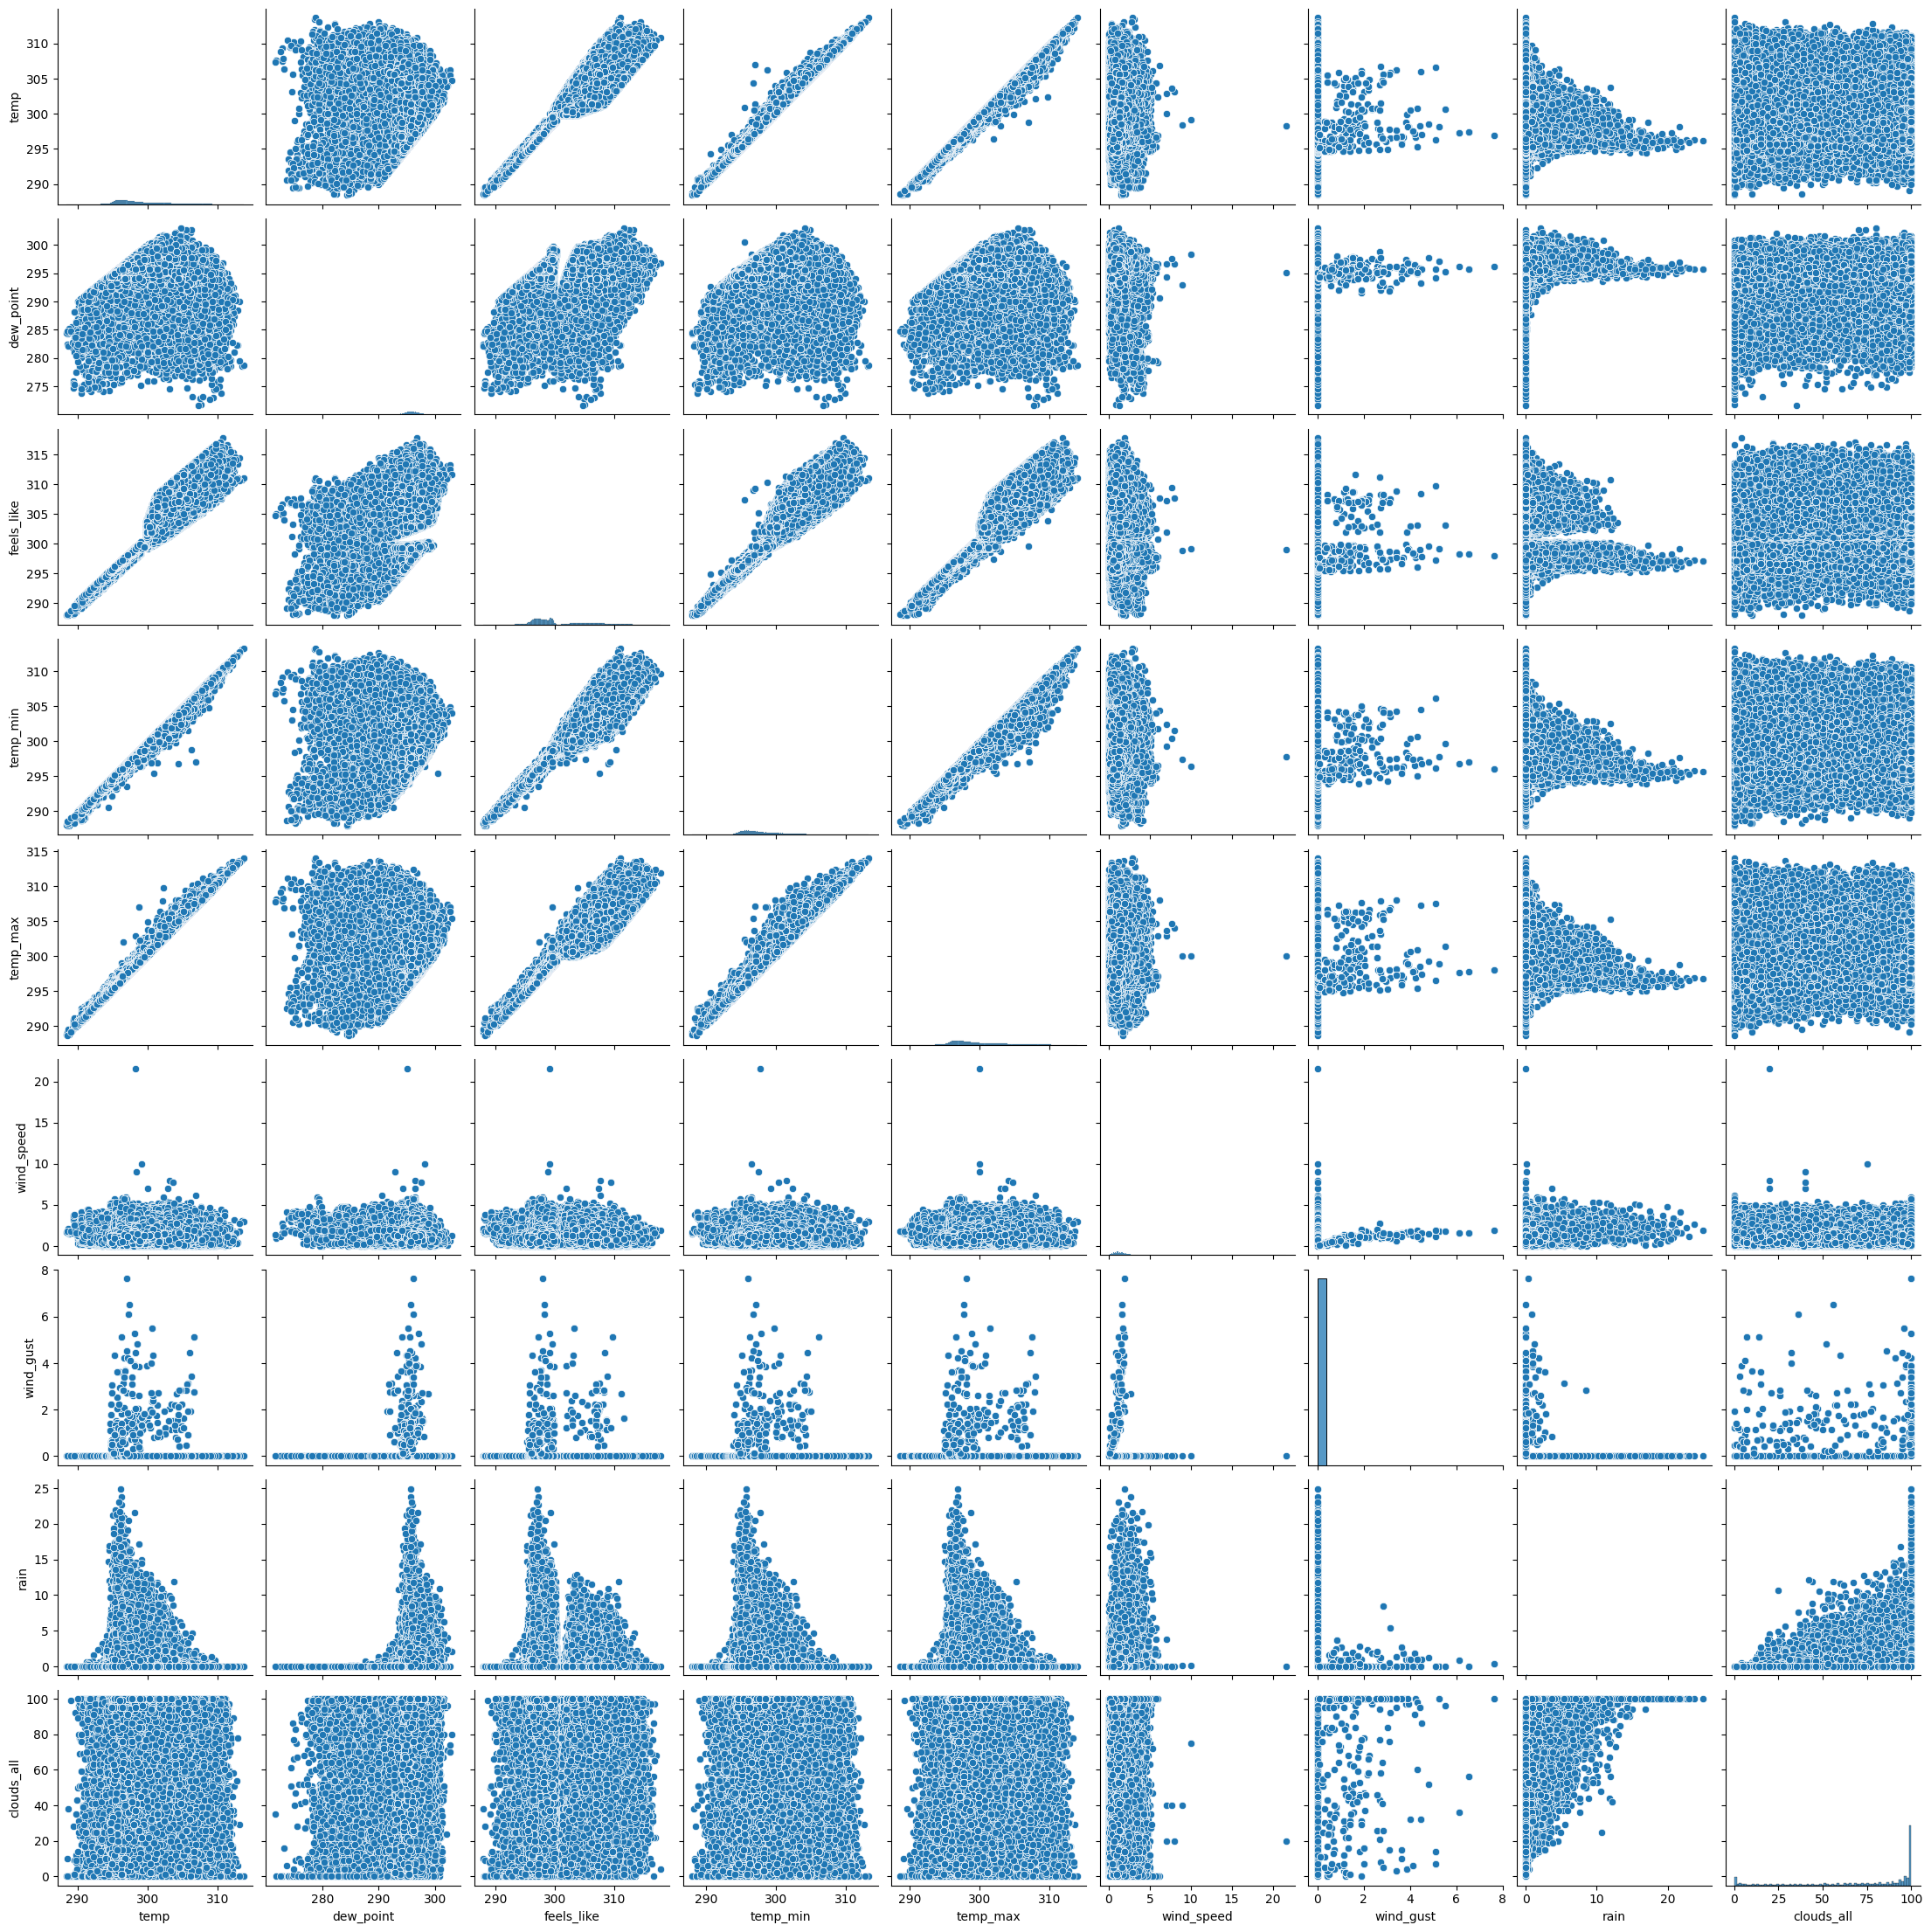

In [21]:
# Visualization
sns.pairplot(X)
plt.show()

In [22]:
flood_training_data.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,rain,flood_occurred
0,283996800,1979-01-01 00:00:00 +0000 UTC,0,Sierra Leone,8.460555,-11.779889,296.36,NaN,296.19,297.32,...,0.0,NaN,NaN,48,802,Clouds,scattered clouds,03n,0.0,0
1,284000400,1979-01-01 01:00:00 +0000 UTC,0,Sierra Leone,8.460555,-11.779889,296.14,NaN,296.14,297.11,...,0.0,NaN,NaN,64,803,Clouds,broken clouds,04n,0.0,0
2,284004000,1979-01-01 02:00:00 +0000 UTC,0,Sierra Leone,8.460555,-11.779889,296.21,NaN,296.21,297.18,...,0.0,NaN,NaN,100,804,Clouds,overcast clouds,04n,0.0,0
3,284007600,1979-01-01 03:00:00 +0000 UTC,0,Sierra Leone,8.460555,-11.779889,296.06,NaN,295.73,296.97,...,0.0,NaN,NaN,100,804,Clouds,overcast clouds,04n,0.0,0
4,284011200,1979-01-01 04:00:00 +0000 UTC,0,Sierra Leone,8.460555,-11.779889,296.19,NaN,295.86,297.11,...,0.0,NaN,NaN,100,804,Clouds,overcast clouds,04n,0.0,0


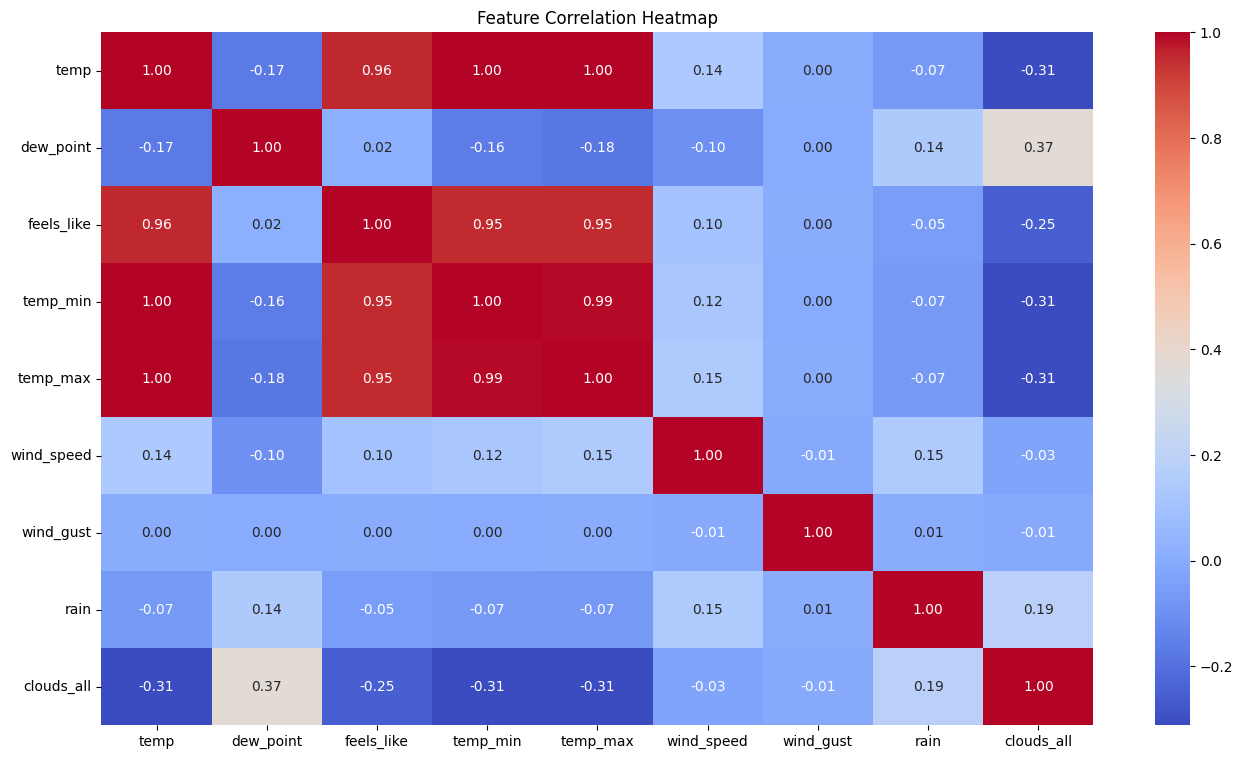

In [23]:
# Correlation Heatmap
correlation_matrix = X.corr()
plt.figure(figsize=(16,9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [24]:
y = pd.Series(y)
print(y.isnull().sum())

0


In [25]:
y = y.squeeze()

In [26]:
# Model Selection

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

In [27]:
print(X.head())

     temp  dew_point  feels_like  temp_min  temp_max  wind_speed  wind_gust  \
0  296.36     296.19      297.32    295.84    297.01        1.68        0.0   
1  296.14     296.14      297.11    295.51    296.91        1.32        0.0   
2  296.21     296.21      297.18    295.63    296.93        1.34        0.0   
3  296.06     295.73      296.97    295.59    296.56        1.26        0.0   
4  296.19     295.86      297.11    295.71    296.70        1.14        0.0   

   rain  clouds_all  
0   0.0          48  
1   0.0          64  
2   0.0         100  
3   0.0         100  
4   0.0         100  


In [28]:
print(y.head())

0    0
1    0
2    0
3    0
4    0
dtype: int64


In [29]:
# Choose models
models = {
    'RandomForest': RandomForestClassifier(random_state=None),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=None),
    'KNeighbors': KNeighborsClassifier(),
    'SVC': SVC(random_state=None),
    'DecisionTree': DecisionTreeClassifier(random_state=None)
}

In [30]:
# Cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name} Cross-Validation Accuracy: {np.mean(scores):.4f} (std: {np.std(scores):.4f})")

RandomForest Cross-Validation Accuracy: 1.0000 (std: 0.0000)
LogisticRegression Cross-Validation Accuracy: 0.9999 (std: 0.0000)
KNeighbors Cross-Validation Accuracy: 0.9985 (std: 0.0002)
SVC Cross-Validation Accuracy: 0.9861 (std: 0.0004)
DecisionTree Cross-Validation Accuracy: 1.0000 (std: 0.0000)


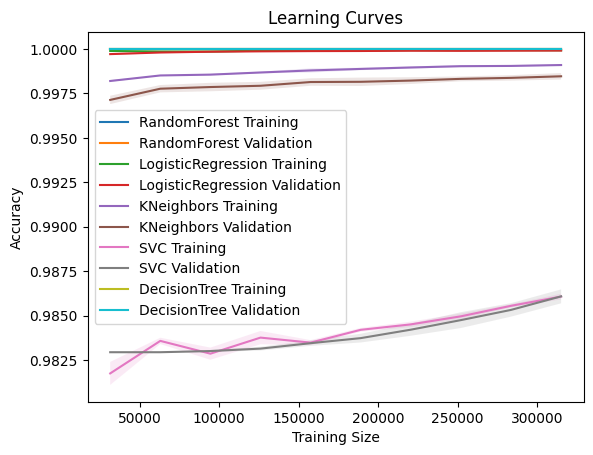

In [31]:
# Learning Curve
for name, model in models.items():
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

#     plt.figure(figsize=(16,9))
    plt.plot(train_sizes, train_mean, label=f"{name} Training")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
    plt.plot(train_sizes, test_mean, label=f"{name} Validation")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)

plt.title("Learning Curves")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [38]:
# # Use VarianceThreshold to remove constant features
# from sklearn.feature_selection import VarianceThreshold
# from sklearn.preprocessing import FunctionTransformer

# # Define a function to remove constant features
# def remove_constant_features(X):
#     selector = VarianceThreshold()
#     X_filtered = selector.fit_transform(X)
#     return X_filtered

In [39]:
# print(remove_constant_features(X).shape)

In [40]:
# print(y.shape)

In [41]:
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions, zero_division=1)
    
    # Print the results
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy*100}")
    print("Classification Report:")
    print(report)
    print("\n" + "="*50 + "\n")


Model: RandomForest
Accuracy: 100.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     77473
           1       1.00      1.00      1.00      1282

    accuracy                           1.00     78755
   macro avg       1.00      1.00      1.00     78755
weighted avg       1.00      1.00      1.00     78755



Model: LogisticRegression
Accuracy: 99.98857215414894
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     77473
           1       1.00      1.00      1.00      1282

    accuracy                           1.00     78755
   macro avg       1.00      1.00      1.00     78755
weighted avg       1.00      1.00      1.00     78755



Model: KNeighbors
Accuracy: 99.84508920068566
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     77473
           1       0.97     

In [42]:
# Use pickle for model serialization
import pickle  

# Save the trained model to a file using pickle
with open('final_flood_prediction_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

In [43]:
flood_training_data.to_csv('flood_training_data.csv', index=False)